<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/R_matrix_analysis_plotting_20240326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
install.packages("caret")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]


Skipping 1 packages not available: rgdal

Installing 4 packages: R.methodsS3, R.oo, rgdal, R.utils

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpcn23C1/remotes19131f88b11/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmpcn23C1/file1915d68cba5/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [46]:
library(googledrive)
library(raster)
library(magrittr)
library(data.table)
library(caret)
library(ggplot2)
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:raster’:

    extract




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c9efc8932b9fc54b220e8dbcef7b5d9c&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQ3M5dGJXQ2FvVHdsakkwMlVGSDNtQmxVS3lBR3ZlcGxkbjJFUVYtWGt0dFAxUWU3c1oyZUFrVWt0V2ttVlJfQSIsInN0YXRlIjoiYzllZmM4OTMyYjlmYzU0YjIyMGU4ZGJjZWY3YjVkOWMifQ==


In [4]:
# https://drive.google.com/file/d/1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c/view?usp=drive_link
drive_download(file = as_id('1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c'), path =  '/content/oneYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/11uePUMaH5sYMIuqtjY7omum7QtBrfpjM/view?usp=drive_link
drive_download(file = as_id('11uePUMaH5sYMIuqtjY7omum7QtBrfpjM'), path =  '/content/twoYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ/view?usp=drive_link
drive_download(file = as_id('1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ'), path =  '/content/threeYear.zip', overwrite = TRUE)

File downloaded:

• model_03222023_1255-20240326T202803Z-001.zip
  <id: 1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c>

Saved locally as:

• /content/oneYear.zip

File downloaded:

• model_03222024_1255-20240327T170048Z-001.zip
  <id: 11uePUMaH5sYMIuqtjY7omum7QtBrfpjM>

Saved locally as:

• /content/twoYear.zip

File downloaded:

• model_03222023_1255-20240327T170243Z-001.zip
  <id: 1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ>

Saved locally as:

• /content/threeYear.zip



In [6]:
unzip("/content/oneYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/oneYear", unzip = "internal",
      setTimes = FALSE)

In [7]:
unzip("/content/twoYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/twoYear", unzip = "internal",
      setTimes = FALSE)

In [8]:
unzip("/content/threeYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/threeYear", unzip = "internal",
      setTimes = FALSE)

pause

In [9]:
oneYear_file_list <-list.files("/content/oneYear/model_03222023_1255", pattern = "*.tif", full.names = TRUE)

In [13]:
oneYear_file_list[[50]]

[1] "/content/oneYear/model_03222023_1255/epoch_41_1530_planet_stack_utm4.tif"

In [18]:
oneYear_raster_list <- oneYear_file_list[50] %>% lapply(stack)

In [19]:
oneYear_raster_list

[[1]]
class      : RasterStack 
dimensions : 384, 384, 147456, 1  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 628182, 628566, 2365605, 2365989  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : epoch_41_1530_planet_stack_utm4 



In [20]:
# https://drive.google.com/file/d/1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u/view?usp=drive_link
drive_download(file = as_id('1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u'), path =  '/content/groudTruth_labels.zip', overwrite = TRUE)

File downloaded:

• test_labels-20240326T203837Z-001.zip <id: 1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u>

Saved locally as:

• /content/groudTruth_labels.zip



In [21]:
unzip("/content/groudTruth_labels.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/groudTruth_labels", unzip = "internal",
      setTimes = FALSE)

In [30]:
# oneYear_file_list <-list.files("/content/oneYear/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
groudTruth_file_list <-list.files("/content/groudTruth_labels/test_labels", pattern = "*.tif", full.names = TRUE)

In [32]:
groudTruth_file_list

[1] "/content/groudTruth_labels/test_labels/1530_nwi_ccap_filled_utm4.tif"
[2] "/content/groudTruth_labels/test_labels/1532_nwi_ccap_filled_utm4.tif"
[3] "/content/groudTruth_labels/test_labels/1546_nwi_ccap_filled_utm4.tif"
[4] "/content/groudTruth_labels/test_labels/1557_nwi_ccap_filled_utm4.tif"
[5] "/content/groudTruth_labels/test_labels/2118_nwi_ccap_filled_utm4.tif"
[6] "/content/groudTruth_labels/test_labels/2355_nwi_ccap_filled_utm4.tif"
[7] "/content/groudTruth_labels/test_labels/823_nwi_ccap_filled_utm4.tif"

In [33]:
groudTruth_raster_list <- groudTruth_file_list[1] %>% lapply(stack)

In [66]:
groudTruth_raster_list

[[1]]
class      : RasterStack 
dimensions : 384, 384, 147456, 1  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 628182, 628566, 2365605, 2365989  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : X1530_nwi_ccap_filled_utm4 
min values :                          3 
max values :                         11 



In [67]:
val_dt <- data.table(truth = values(groudTruth_raster_list[[1]]),prediction = values(oneYear_raster_list[[1]]))

In [68]:
val_dt

truth.X1530_nwi_ccap_filled_utm4,prediction.epoch_41_1530_planet_stack_utm4
<dbl>,<dbl>
10,10
10,10
10,10
10,10
10,10
10,10
10,10
10,10
10,10


In [69]:
confus_dt <- confusionMatrix(val_dt$truth %>% factor(levels = 0:12), val_dt$prediction %>% factor(levels = 0:12))

In [70]:
confus_dt

Confusion Matrix and Statistics

          Reference
Prediction     0     1     2     3     4     5     6     7     8     9    10
        0      0     0     0     0     0     0     0     0     0     0     0
        1      0     0     0     0     0     0     0     0     0     0     0
        2      0     0     0     0     0     0     0     0     0     0     0
        3      0 53118     0     0     0     0     0   194     0     0 15189
        4      0     0     0     0     0     0     0     0     0     0     0
        5      0  7393     0     0     0     0     0     0     0     0  9033
        6      0   781     0     0     0     0     0     0     0     0  3175
        7      0     0     0     0     0     0     0     0     0     0     0
        8      0   202     0     0     0     0     0    18     0     0   928
        9      0     0     0     0     0     0     0     0     0     0     0
        10     0 21775     0     0     0     0     0   720     0     0 31003
        11     0   305 

In [80]:
confusion_df <- data.frame(confusion_dt$table)

In [81]:
confusion_df

Prediction,Reference,Freq
<fct>,<fct>,<int>
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0


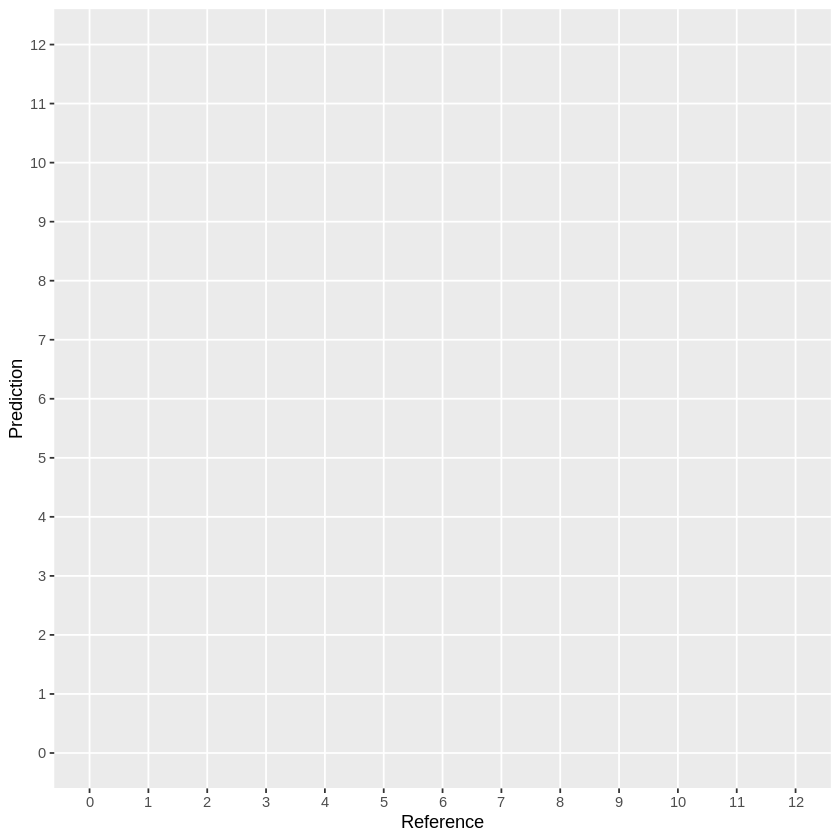

In [84]:
ggplot(data = confusion_df, aes(x = Reference, y = Prediction, fill = Freq))

In [41]:
# byClass_dt <- confusion_dt$byClass %>% data.table

In [ ]:
# byClass_dt

In [ ]:
# byClass_dt$Sensitivity %>% data.table

In [ ]:
prettyConfused<-function(Actual,Predict,colors=c("white","red4","dodgerblue3"),text.scl=5){
  actual = as.data.frame(table(Actual))
  names(actual) = c("Actual","ActualFreq")

  #build confusion matrix
  confusion = as.data.frame(table(Actual, Predict))
  names(confusion) = c("Actual","Predicted","Freq")

  #calculate percentage of test cases based on actual frequency

  confusion = merge(confusion, actual, by=c('Actual','Actual'))
  confusion$Percent = confusion$Freq/confusion$ActualFreq*100
  confusion$ColorScale<-confusion$Percent*-1
  confusion[which(confusion$Actual==confusion$Predicted),]$ColorScale<-confusion[which(confusion$Actual==confusion$Predicted),]$ColorScale*-1
  confusion$Label<-paste(round(confusion$Percent,0),"%, n=",confusion$Freq,sep="")
  tile <- ggplot() +
    geom_tile(aes(x=Actual, y=Predicted,fill=ColorScale),data=confusion, color="black",size=0.1) +
    labs(x="Actual",y="Predicted")

  tile = tile +
        geom_text(aes(x=Actual,y=Predicted, label=Label),data=confusion, size=text.scl, colour="black") +
        scale_fill_gradient2(low=colors[2],high=colors[3],mid=colors[1],midpoint = 0,guide='none')
}